# Genetic Algorithm for Knapsack Problem
### Created by Ashley Bedford, Rehmana Younis, & Robert Romanski

##### Our team has created two possible solutions to solve the classic Kanpsack Problem. One method is a modified version of Dr. Hodhod's example code and another uses the Pygad Library.

## Modified Genetic Algorithm Solution
source used to inspire code architecture and methods: https://arpitbhayani.me/blogs/genetic-knapsack

### Install PIP Statements

In [1]:
# !pip install ypstruct

### Import Libraries

In [2]:
import random
from typing import List
from ypstruct import structure

### Define All Parameters

In [3]:
params = structure()
params.MAX_WEIGHT = 15
params.CRATE = 0.53 # Cross over rate 
params.MRATE = 0.013 # Mutation Rate
params.RRATE = 0.15 # Reproduction Rate
params.count = 9 # Number of individuals in a population

### Create Item Class
##### This Ind_Item class allows us to define our items' name, weight, and value. We can access these data points using ***Ind_Item Object***.weight for example.

In [4]:
class Ind_Item:
    def __init__(self, item_name, item_weight, item_value):
        self.name = item_name
        self.weight = item_weight
        self.value = item_value

### Create our Items
##### We created 5 items below to run through our Genetic Algorithms and created a method to print the results below.
##### The parameters of each item are (name, weight, value)

In [5]:
items = [
    Ind_Item("Copper", 7, 1),
    Ind_Item("Gold", 2, 7),
    Ind_Item("Granite", 1, 7),
    Ind_Item("Diamond", 9, 2),
    Ind_Item("Marble", 4, 5),
]

def print_items(items):
  print()
  print("*" * 100)
  print('Available Items')
  print("*" * 100)
  for item in items:
    print('Item: ', item.name, '  Weight: ', item.weight, '  Value: ', item.value)
  print("*" * 100)

### Define a Method for Each Individual in Population
##### Here we defined an individual as a chromosome and created a fitness function for it. The fitness function below calculates a cumulative weight and value per each chromosome/individual. If a chromosome/individual's cumulative weight is over the params.MAX_WEIGHT, it recieves a fitness function of zero, else it recieves a fitness function equal to it's cumulative value. 
##### It is important to remember that each chromosome is a string of binary values, with each bit indicating whether its corresponding item is present in the knapsack

In [6]:
class Single_Ind:
    def __init__(self, chromosomes):
        self.chromosomes = chromosomes
    
    def __str__(self):
        return repr(self.chromosomes)
    
    def fitness_func(self) -> float:
        total_value=0
        total_weight=0
        for item, chrome in zip(items, self.chromosomes):
          total_value+= chrome * item.value 

        for item, chrome in zip(items, self.chromosomes):
          total_weight += chrome * item.weight


        if total_weight <= params.MAX_WEIGHT:
            return total_value
        
        return 0

### Define an Initial Population Method
##### Below we create a population with random bit values that has 9 rows (params.count) and 5 columns (len(items)).

In [7]:
def create_population(count=8):
    population = set()

    while len(population) != count:
        # pick random bits one for each item and 
        # create an individual 
        bits = [
            random.choice([0, 1])
            for _ in items
        ]
        population.add(Single_Ind(bits))
    population=list(population)
    print()
    print("*" * 100)
    print('Original Population')
    print("*" * 100)
    for pop in population:
      print(pop,pop.fitness_func() )
    print("*" * 100)
    return list(population)

### Define Selection Method
##### The fittest chromosomes of the population are selected by:
##### 1. randomizing their order to avoid skewed results
##### 2. pair the first four chromosomes and copy the contents of the healthiest into a parents chromosome that will be used later
##### In summary, we implemented a Tournament type of Selection. The first 4 individuals in our population are selected and compared to each other. The individuals with the Top 2 Fitness values move on to become parents and create a child.

In [8]:
def selection(population):
    parents = []
    
    # randomly shuffle the population
    random.shuffle(population)

    # we use the first 4 individuals
    # run a tournament between them and
    # get two fit parents for the next steps of evolution

    # tournament between first and second
    if population[0].fitness_func() > population[1].fitness_func():
        parents.append(population[0])
    else:
        parents.append(population[1])
    
    # tournament between third and fourth
    if population[2].fitness_func() > population[3].fitness_func():
        parents.append(population[2])
    else:
        parents.append(population[3])

    return parents

### Define Crossover Method
##### The two parent chromosomes created in the 'selection' function, is now used to create two children by:
##### 1. copying the first half of parent chromosome1 and last half of chromosome2 into a new  chromosome named child1
##### 2. copying the first half of parent chromosome2 and last half of chromosome1 into a new  chromosome named child2
##### In summary, the 2 most fit parents from above will go through a single-point Crossover. This means that a point is chosen in which one part of the first parent will join with another part fo the second parent to create a child, aka a new individual, in our population. Two children are created from these parents and returned in the method below.

In [9]:
def crossover(parents):
    total = len(items)

    child1 = parents[0].chromosomes[:total//2] + parents[1].chromosomes[total//2:]
    child2 = parents[0].chromosomes[total//2:] + parents[1].chromosomes[:total//2]

    return [Single_Ind(child1), Single_Ind(child2)]

### Define Mutate Method
##### The two children created in the 'crossover' function are mutated only if a random number chosen while iterating through gene each is within the threshold of the pre-defined mutation rate
##### Mutation is performed by here setting the value of the gene to its inverse value
##### In summary, a random inidividual will be chosen to go through Mutation. This is where one randomly chosen bit of an individual will be flipped to create a new mutated version of the original individual in our population

In [10]:
def mutate(Single_Ind):
    for individual in Single_Ind:
        for i in range(len(individual.chromosomes)):
            if random.random() < params.MRATE:
                # Flip the bit
                individual.chromosomes[i] = ~individual.chromosomes[i]

### Define Next Generation Method
##### A new generation is created by running the chromosome tournaments in the 'selection function'. In this case, the population count in old and new generations are equal. Next generation chromosomes come from crossover, crossover-mutated, or direct copy , depending on the  probability functions shown below. 
##### In summary, here we implement our selection, crossover, and mutation methods above to create a new generation of possible solutions to be evaluated against.

In [11]:
def next_generation(population):
    next_gen = []
    while len(next_gen) < len(population):
        children = []

        parents = selection(population)

        if random.random() < params.RRATE:
            children = parents
        else:
            if random.random() < params.CRATE:
                children = crossover(parents)
            
            if random.random() < params.MRATE:
                mutate(children)

        next_gen.extend(children)

    return next_gen[:len(population)]

### Define Solve Method
##### Here we create our Genetic Algorithm function. It creates the initial population, then iteratively creates the next generation 500 times. As explained above, next_generation method conducts the parent selection of tournament, then conducts a single point crossover, and mutates a small amount of children generation over generation. The fitness function is applied to each generation, then the final population is returned.

In [12]:
def solve():
    pop = create_population(params.count)

    avg_fs = []

    for _ in range(500):
        pop = next_generation(pop)

    population = sorted(pop, key=lambda res: res.fitness_func(), reverse=True)
    # print(population)
    return pop[0]

##### We printed our items below.

In [13]:
print_items(items)


****************************************************************************************************
Available Items
****************************************************************************************************
Item:  Copper   Weight:  7   Value:  1
Item:  Gold   Weight:  2   Value:  7
Item:  Granite   Weight:  1   Value:  7
Item:  Diamond   Weight:  9   Value:  2
Item:  Marble   Weight:  4   Value:  5
****************************************************************************************************


### Run the Modified Genetic Algorithm
##### value and weight for each generation is accumulated via the sumproduct of each chromosomes binary value with its  corresponding weight and 'monetary value'. 

In [14]:
solution = solve()
total_value=0
total_weight=0

for item, chrome in zip(items, solution.chromosomes):
  total_value+= chrome * item.value 

for item, chrome in zip(items, solution.chromosomes):
  total_weight += chrome * item.weight


****************************************************************************************************
Original Population
****************************************************************************************************
[0, 1, 1, 0, 0] 14
[1, 1, 1, 1, 0] 0
[1, 0, 1, 1, 1] 0
[1, 0, 0, 0, 1] 6
[0, 1, 1, 0, 1] 19
[0, 0, 1, 1, 1] 14
[0, 1, 1, 0, 0] 14
[0, 0, 0, 1, 0] 2
[1, 0, 1, 1, 1] 0
****************************************************************************************************


##### chromosomes with no value are displayed for warning. This is made relevent when called by the 'solver' function
##### In Summary, we have found a globally optimal solution below. The list of zeroes and ones denote which items were taken (items #1, #3, and #5) and which items were not taken (items #2, and #4).

In [15]:
print()

if solution.fitness_func()==0:
  print(solution, 'Not Good Choice ', solution.fitness_func())
else:
  print(solution,' The Fitness value:   ',   solution.fitness_func())

print('Total Weight of the items: ', total_weight)
# print('Total Value of the items: ' ,total_value)


[1, 0, 1, 0, 1]  The Fitness value:    13
Total Weight of the items:  12


## Pygad Library Solution

### Import Libraries

In [29]:
#!pip install pygad

In [17]:
import pygad
import random
import numpy as np

### Define the Fitness Function
##### This function calculates a cumulative weight and value score of each chromosome in a population. Each gene is multiplied by a weight and value to create these cumulative scores. If the weight score exceeds the params.MAX_WEIGHT, the fitness value returned for the entire chromosome is 0. This means that the solution evaluated through this function is not valid for solving the given Knapsack Problem. If the weight score does not exceed the params.MAX_WEIGHT, the fitness value returned for the entire chromosome is equal to the cumulative value_score, thus making this chromosome a viable solution. The chromosome with the highest fitness value in the population during a generation iteration is a possible candidate for the globally optimal solution across all generations. The chromosome with the highest fitness value within all generations is deemed the globally optimal solution.

In [21]:
def fitness_func(c, c_ind):   # chromosome, chromosome indexes
  weight_score = 0
  weight_score = 0
  value_score = 0
  for i in range(len(items)):
    weight_score = weight_score + np.sum(items[i].weight*c[i])
  if weight_score > params.MAX_WEIGHT:
      fitness = 0
  else:
    for i in range(len(items)):
      value_score = value_score + np.sum(items[i].value*c[i])
    fitness = value_score
  return fitness 

### Define Initial Population
##### Here we create our starting population group using a random set of chromosomes generated by the numpy.random.randint method. The below statement returns a population that represents a column per each item declared and a row for the specified chromosomes we would like in the population (aka params.count variable).

In [22]:
initial_population = np.random.randint(2, size=(params.count, len(items)))

##### Here we define our Callback method. As our Genetic Algorithm runs, the end of each generation will prompt a print statement that shows the completed Generation Number and Fitness value of the best solution within that Generation.

In [23]:
def callback_gen(ga_instance1):
    print("Generation : ", ga_instance1.generations_completed)
    print("Fitness of the best solution :", ga_instance1.best_solution()[1])

### Define All Parameters
##### The pygad library requires values for the following fields and we set the values to closeley match the 'Modified Genetic Algorithm Solution'. For example, the tournament method used in the 'selection' function currently only work with four values thus 'num_parents_mating = 4'.
##### In summary, before running the Pygad Genetic Algorithm, we define all of our parameters. Similar to the first solution above, we chose to implement a Tournament Selection, Single-Point Crossover, and Random Mutation type. We will run 500 Generations before stopping the algorithm.

In [24]:
num_parents_mating = 4
num_generations = 500
mutation_percent_genes = 5
parent_selection_type = "tournament"
crossover_type = "single_point"
mutation_type = "random"
keep_parents = 1
init_range_low = 0
init_range_high = 1

### Create our Pygad Genetic Algorithm
##### Here we made sure to turn on the ability to save our solutions, so that we can go back to reference them.

In [25]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space=[0, 1],
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_gen,
                       save_best_solutions=True,
                       save_solutions=True)

C:\ProgramData\Anaconda3\lib\site-packages\pygad\pygad.py:503: UserWarning: The percentage of genes to mutate (mutation_percent_genes=5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
C:\ProgramData\Anaconda3\lib\site-packages\pygad\pygad.py:820: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  if not self.suppress_warnings: warnings.warn("Use the 'save_best_solutio

### Run the Pygad Genetic Algorithm

In [26]:
ga_instance.run()

Generation :  1
Fitness of the best solution : 16.0
Generation :  2
Fitness of the best solution : 16.0
Generation :  3
Fitness of the best solution : 20.0
Generation :  4
Fitness of the best solution : 19.0
Generation :  5
Fitness of the best solution : 15.0
Generation :  6
Fitness of the best solution : 14.0
Generation :  7
Fitness of the best solution : 19.0
Generation :  8
Fitness of the best solution : 20.0
Generation :  9
Fitness of the best solution : 19.0
Generation :  10
Fitness of the best solution : 20.0
Generation :  11
Fitness of the best solution : 14.0
Generation :  12
Fitness of the best solution : 20.0
Generation :  13
Fitness of the best solution : 20.0
Generation :  14
Fitness of the best solution : 20.0
Generation :  15
Fitness of the best solution : 19.0
Generation :  16
Fitness of the best solution : 14.0
Generation :  17
Fitness of the best solution : 19.0
Generation :  18
Fitness of the best solution : 20.0
Generation :  19
Fitness of the best solution : 20.0
Ge

Generation :  182
Fitness of the best solution : 20.0
Generation :  183
Fitness of the best solution : 20.0
Generation :  184
Fitness of the best solution : 19.0
Generation :  185
Fitness of the best solution : 20.0
Generation :  186
Fitness of the best solution : 20.0
Generation :  187
Fitness of the best solution : 20.0
Generation :  188
Fitness of the best solution : 20.0
Generation :  189
Fitness of the best solution : 19.0
Generation :  190
Fitness of the best solution : 15.0
Generation :  191
Fitness of the best solution : 19.0
Generation :  192
Fitness of the best solution : 20.0
Generation :  193
Fitness of the best solution : 19.0
Generation :  194
Fitness of the best solution : 20.0
Generation :  195
Fitness of the best solution : 20.0
Generation :  196
Fitness of the best solution : 15.0
Generation :  197
Fitness of the best solution : 15.0
Generation :  198
Fitness of the best solution : 14.0
Generation :  199
Fitness of the best solution : 15.0
Generation :  200
Fitness of

Generation :  359
Fitness of the best solution : 20.0
Generation :  360
Fitness of the best solution : 15.0
Generation :  361
Fitness of the best solution : 20.0
Generation :  362
Fitness of the best solution : 20.0
Generation :  363
Fitness of the best solution : 19.0
Generation :  364
Fitness of the best solution : 20.0
Generation :  365
Fitness of the best solution : 20.0
Generation :  366
Fitness of the best solution : 20.0
Generation :  367
Fitness of the best solution : 20.0
Generation :  368
Fitness of the best solution : 20.0
Generation :  369
Fitness of the best solution : 20.0
Generation :  370
Fitness of the best solution : 20.0
Generation :  371
Fitness of the best solution : 20.0
Generation :  372
Fitness of the best solution : 19.0
Generation :  373
Fitness of the best solution : 13.0
Generation :  374
Fitness of the best solution : 20.0
Generation :  375
Fitness of the best solution : 19.0
Generation :  376
Fitness of the best solution : 20.0
Generation :  377
Fitness of

### Display Results

##### Below are the results of our Pygad Genetic Algorithm. The parameters of our best solution display the chromosome that has the highest fitness value without compromising the MAX_WEIGHT constraint.

In [27]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [0. 1. 1. 1. 0.]
Fitness value of the best solution = 16.0
Index of the best solution : 1


##### Below is a plot of our Generation's Fitness over Time. As you can see, the best fitness value of each generation flucuates as our parent selection, crossover, and mutation activities occur.

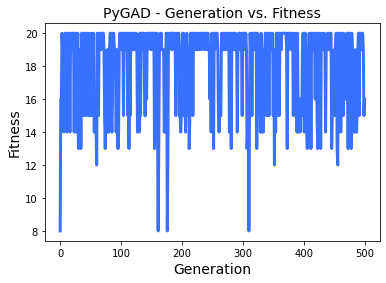

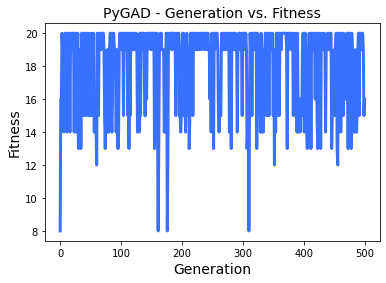

In [28]:
ga_instance.plot_fitness()